In [81]:
import pandas as pd
df=pd.read_csv("Copy of EastWestAirlines.csv")
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [82]:
# Data preprocessing
df.dropna(inplace=True)  # Remove rows with missing values

In [83]:
# Handle outliers 
z_scores = (df - df.mean()) / df.std()
df = df[(z_scores < 3).all(axis=1)]

In [84]:
# Data preprocessing
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
#print(df_scaled)

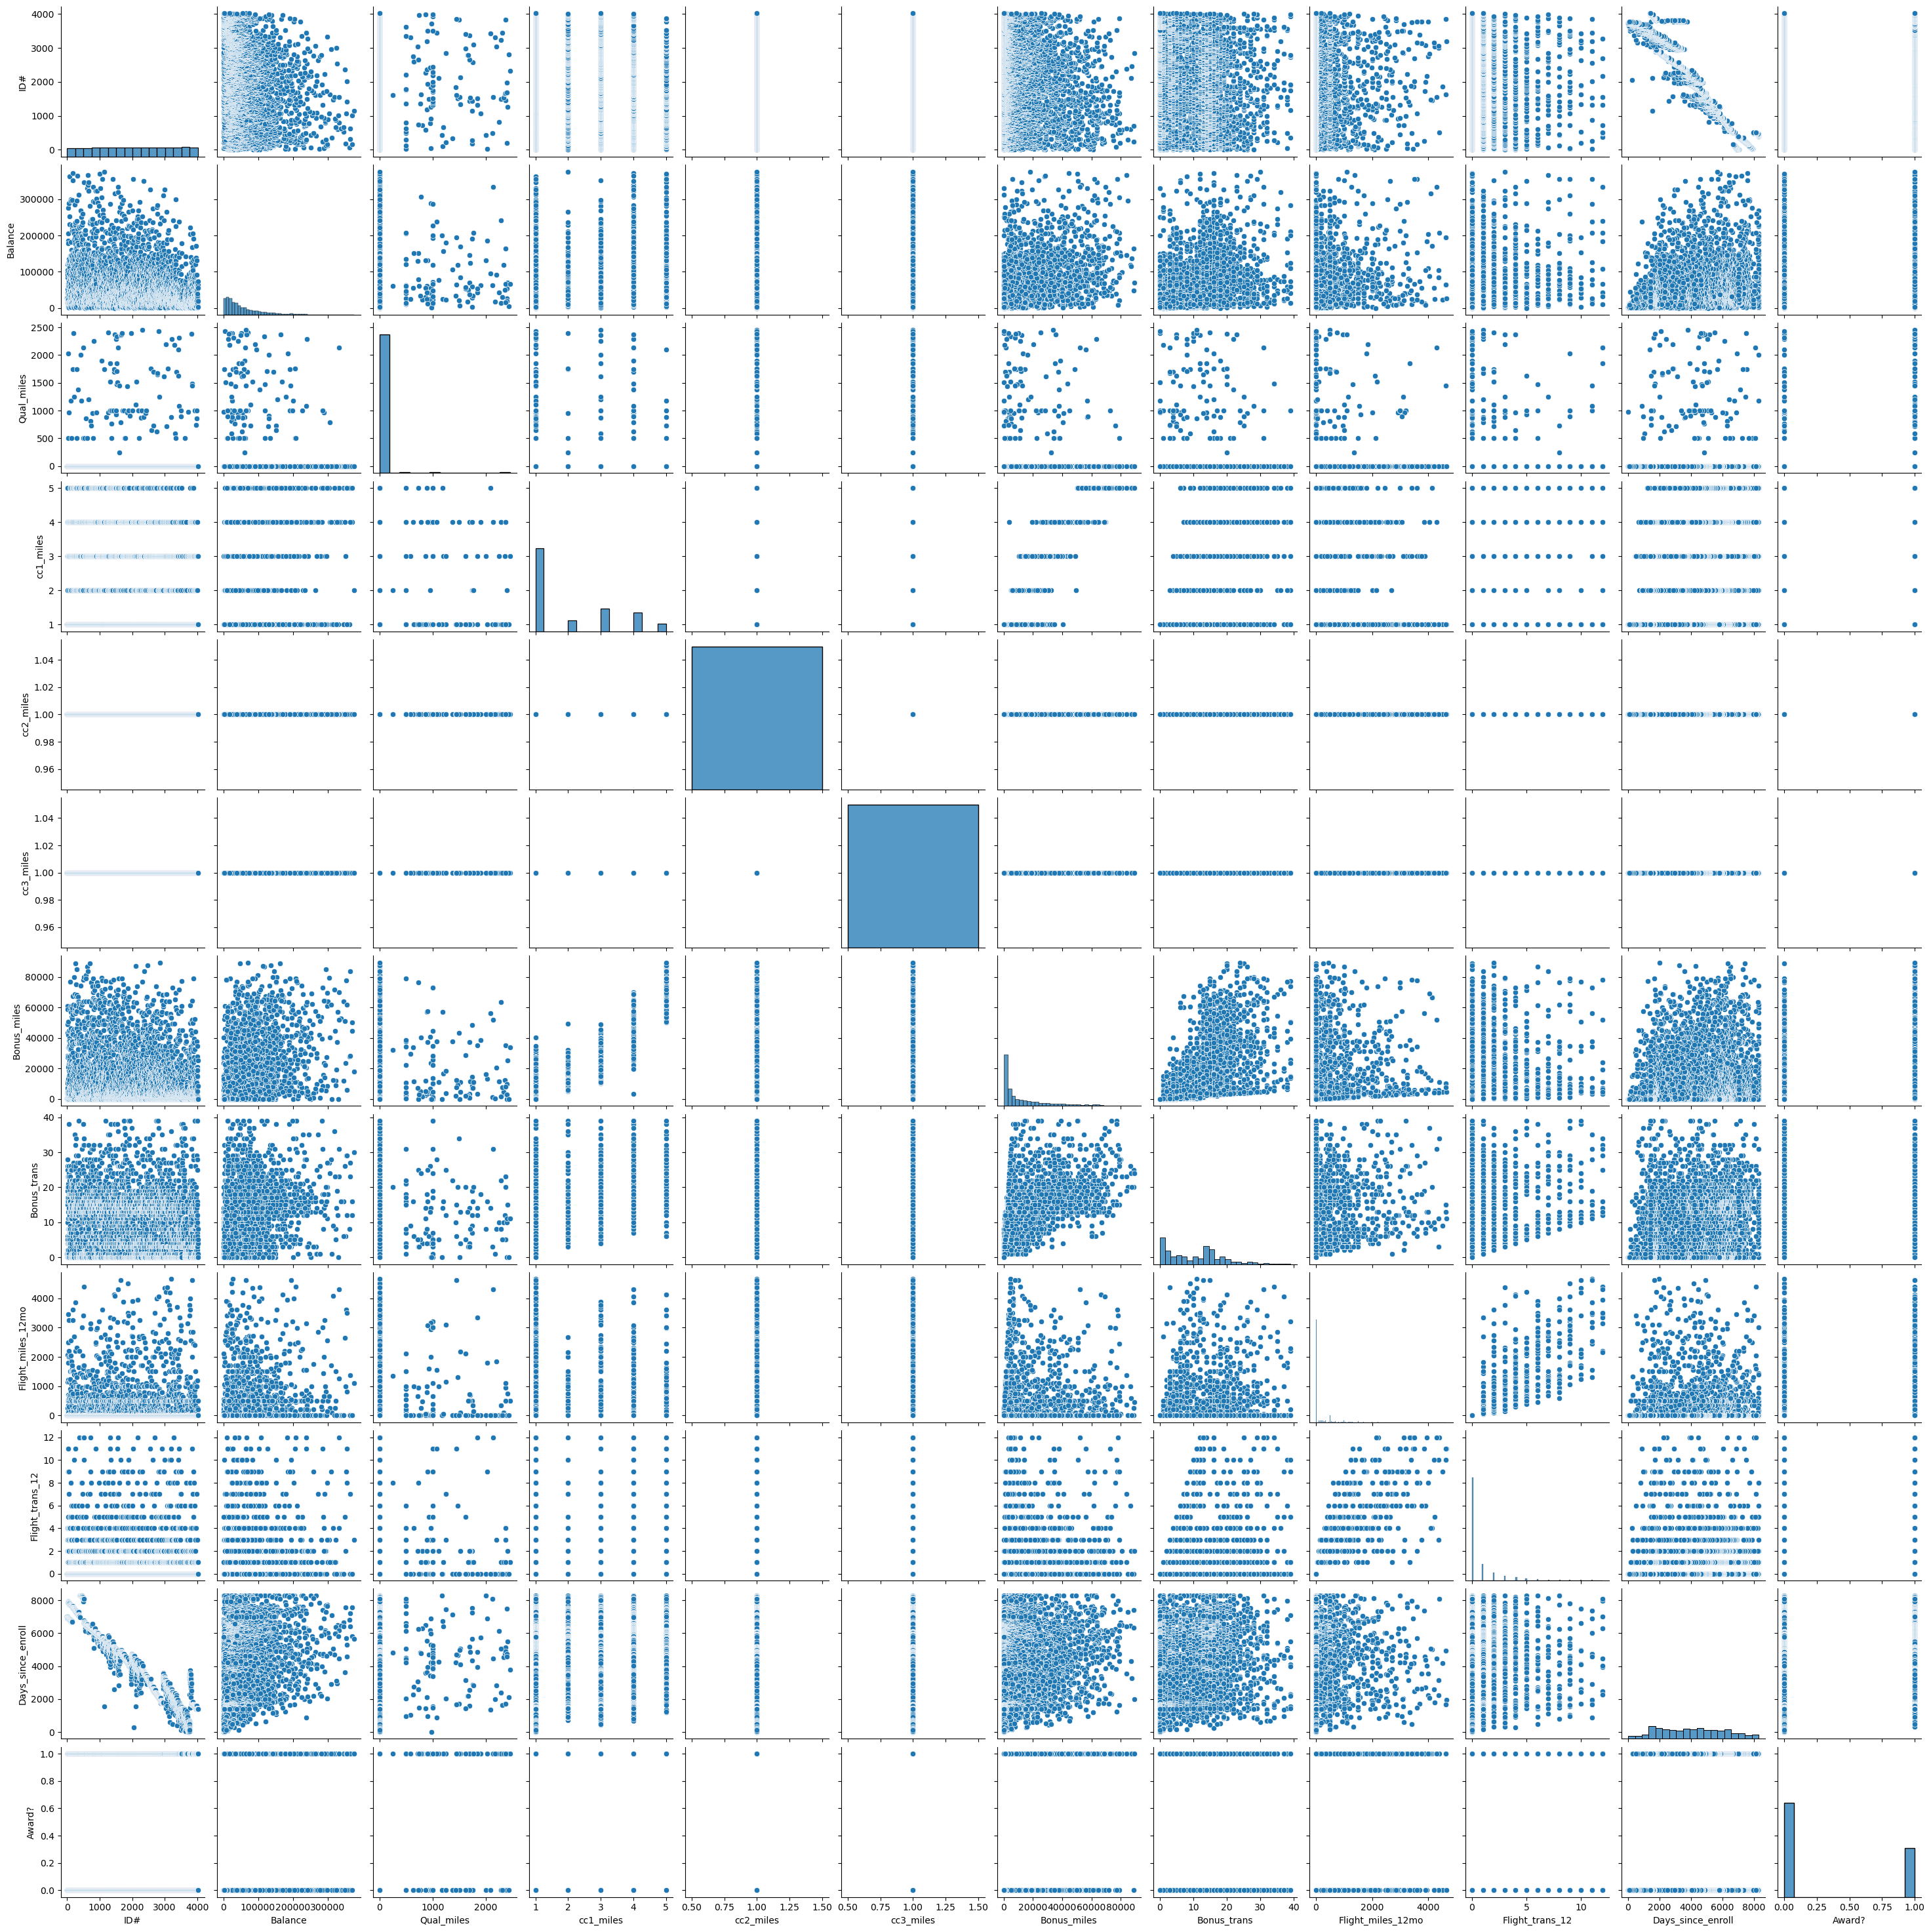

In [85]:
# Exploratory Data Analysis (EDA)
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", "use_inf_as_na option is deprecated")
import seaborn as sns
sns.pairplot(df)
plt.show()

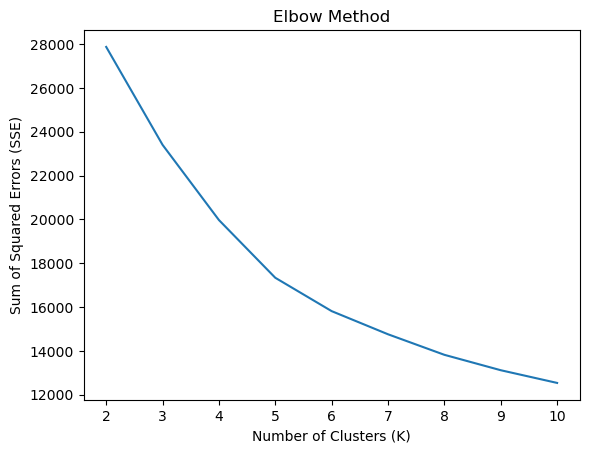

In [86]:
# K-Means Clustering
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
sse = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    sse.append(kmeans.inertia_)
warnings.filterwarnings("ignore", "The default value of `n_init` will change from 10 to 'auto' in 1.4")

plt.plot(range(2, 11), sse)
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method')
plt.show()

In [87]:
'''The elbow point in the plot seems to be around K=5 or 6. However, the curve continues to decrease significantly until K=7. This indicates that adding one more cluster from K=6 to K=7 provides a  
reduction in the Sum of Squared Errors (SSE).'''

'The elbow point in the plot seems to be around K=5 or 6. However, the curve continues to decrease significantly until K=7. This indicates that adding one more cluster from K=6 to K=7 provides a  \nreduction in the Sum of Squared Errors (SSE).'

In [88]:
k_optimal = 7  
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
labels_kmeans = kmeans.fit_predict(df_scaled)




In [89]:
# Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=k_optimal)
labels_hierarchical = hierarchical.fit_predict(df_scaled)


In [90]:
# DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjust parameters as needed
labels_dbscan = dbscan.fit_predict(df_scaled)

In [97]:
# Evaluate clustering results
from sklearn.metrics import silhouette_score
silhouette_kmeans = silhouette_score(df_scaled, labels_kmeans)
silhouette_hierarchical = silhouette_score(df_scaled, labels_hierarchical)
silhouette_dbscan = silhouette_score(df_scaled, labels_dbscan)

print("Silhouette Score (K-Means):", silhouette_kmeans)
print("Silhouette Score (Hierarchical):", silhouette_hierarchical)
print("Silhouette Score (DBSCAN):", silhouette_dbscan)

Silhouette Score (K-Means): 0.25980917855645336
Silhouette Score (Hierarchical): 0.19308756830079443
Silhouette Score (DBSCAN): -0.3994808098553046


In [98]:
'''While the K-Means score is not exceptionally high, it is significantly better than the other two algorithms. This suggests that K-Means is the most suitable clustering algorithm'''


'While the K-Means score is not exceptionally high, it is significantly better than the other two algorithms. This suggests that K-Means is the most suitable clustering algorithm'

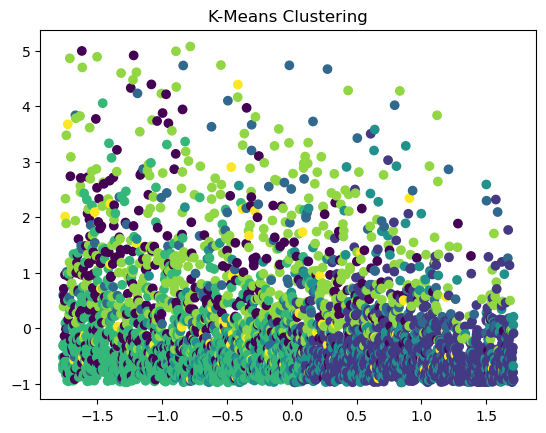

In [100]:
# Visualize clusters
plt.scatter(df_scaled[:, 0], df_scaled[:, 1], c=labels_kmeans, cmap='viridis')
plt.title('K-Means Clustering')
plt.show()

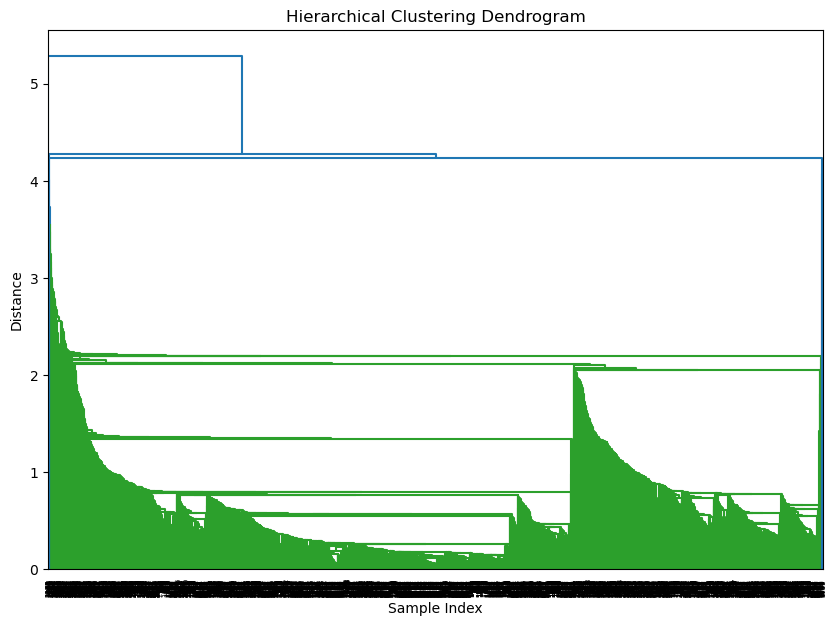

In [105]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage,dendrogram

# Assuming you have the linkage matrix
Z = linkage(df_scaled)

plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

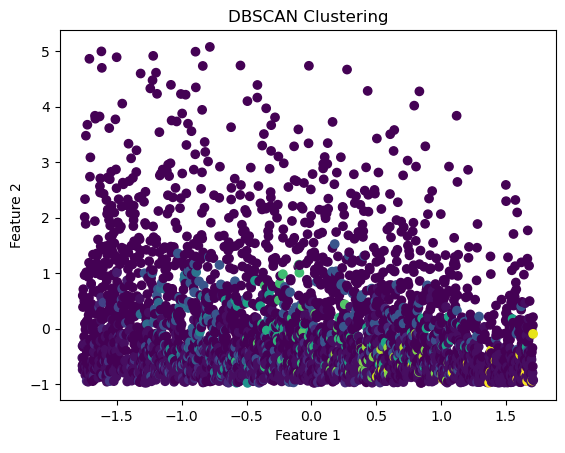

In [107]:
plt.scatter(df_scaled[:, 0], df_scaled[:, 1], c=labels_dbscan, cmap='viridis')
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [114]:
'''we can't get cluster formation with scatter plot with huge data. So, considering KDE plot'''


"we can't get cluster formation with scatter plot with huge data. So, considering KDE plot"

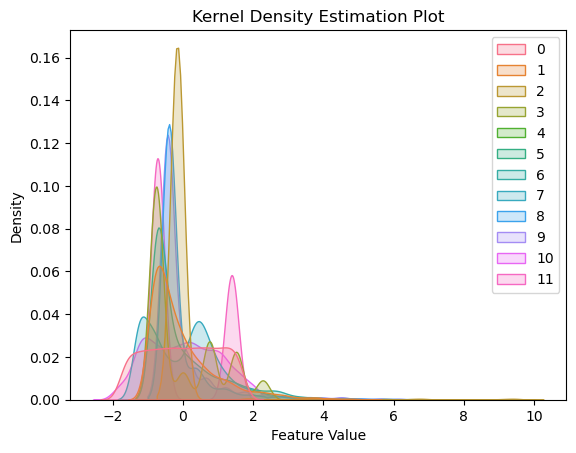

In [113]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have your data in a DataFrame or NumPy array named 'data'

sns.kdeplot( df_scaled, fill=True)
plt.title('Kernel Density Estimation Plot')
plt.xlabel('Feature Value')
plt.ylabel('Density')
plt.show()